OBJECTIVES OF THIS TASK

1. Making assumptions from the information provided

2. To predict the production quantity for Grople syrup

3. How to submit results:
1. prediction_production_qty.csv
2. save the link of colab in csv file

Evaluation Model:
1. MAPE:
2. R2:
3. Runtime

STEPS TO DO THE PREDICTION TASK
1. Data loading
2. Data cleaning and data wrangling
3. EDA
4. Data Visualizations
5. Feature Engineering
6. Prediction
7. Testing
8. Evaluating the model

### DATA LOADING

In [ ]:
import math # Mathematical functions 
import numpy as np # Fundamental package for scientific computing with Python
import pandas as pd # Additional functions for analysing and manipulating data
from datetime import date, timedelta, datetime # Date Functions
from pandas.plotting import register_matplotlib_converters # This function adds plotting functions for calender dates
import matplotlib.pyplot as plt # Important package for visualization - we use this to plot the market data
import matplotlib.dates as mdates # Formatting dates
from sklearn.metrics import mean_absolute_error, mean_squared_error # Packages for measuring model performance / errors
from keras.models import Sequential # Deep learning library, used for neural networks
from keras.layers import LSTM, Dense, Dropout # Deep learning classes for recurrent and regular densely-connected layers
from keras.callbacks import EarlyStopping # EarlyStopping during model training
from sklearn.preprocessing import RobustScaler, MinMaxScaler # This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
import seaborn as sns
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import tensorflow as tf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Assumptions about the Production quantity data:

1. After analysing ProductionQuantity.csv it is clear that the data is recorded monthly wise 
2. It has also been assumed assumed that there are no null values/NA values

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

prod_quantity = pd.read_csv("/content/ProductionQuantity.csv")
prod_quantity

,start_date,end_date,prod,region_id
0,2015-01-01T00:00:00.000Z,2015-01-31T00:00:00.000Z,171725,93
1,2015-02-01T00:00:00.000Z,2015-02-28T00:00:00.000Z,188325,93
2,2015-03-01T00:00:00.000Z,2015-03-31T00:00:00.000Z,247856,93
3,2015-04-01T00:00:00.000Z,2015-04-30T00:00:00.000Z,282791,93
4,2015-05-01T00:00:00.000Z,2015-05-31T00:00:00.000Z,291057,93
...,...,...,...,...
715,2020-08-01T00:00:00.000Z,2020-08-31T00:00:00.000Z,57818,105
716,2020-09-01T00:00:00.000Z,2020-09-30T00:00:00.000Z,57474,105
717,2020-10-01T00:00:00.000Z,2020-10-31T00:00:00.000Z,51821,105
718,2020-11-01T00:00:00.000Z,2020-11-30T00:00:00.000Z,44947,105


### DATA WRANGLING AND CLEANING

In [ ]:
prod_quantity['start_date'] = pd.to_datetime(prod_quantity['start_date']).dt.date
prod_quantity['end_date'] = pd.to_datetime(prod_quantity['end_date']).dt.date   

prod_data = prod_quantity.copy()
prod_data['end_date'] = pd.to_datetime(prod_data['end_date'])
del prod_data['start_date']
prod_data['date'] = prod_data['end_date']
prod_data = prod_data.set_index('date')
prod_data = prod_data.drop('end_date', axis = 1)
prod_data

,prod,region_id
date,,
2015-01-31,171725,93
2015-02-28,188325,93
2015-03-31,247856,93
2015-04-30,282791,93
2015-05-31,291057,93
...,...,...
2020-08-31,57818,105
2020-09-30,57474,105
2020-10-31,51821,105


Assumptions about the Precipitation data:

1. After analysing Precipitation it is clear that the data is recorded daily-wise and starts from 2014 and ends at 2022 but we need to resample it to monthly data and select the subset of data from 2015 to 2020

2. It has also been assumed assumed that there are no null values/NA values

In [ ]:
daily_prec = pd.read_csv("/content/DailyPrecipitation.csv")
daily_prec['start_date'] = pd.to_datetime(daily_prec['start_date']).dt.date
daily_prec['end_date'] = pd.to_datetime(daily_prec['end_date']).dt.date

prec = daily_prec.copy()
prec['start_date'] = pd.to_datetime(prec['start_date'])
del prec['end_date']
prec['date'] = prec['start_date']
prec = prec.set_index('date').groupby('region_id').resample('M').mean()
prec.index = prec.index.get_level_values(1)
prec = prec.loc["2015-01-01":"2021-01-01"]
prec

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  # This is added back by InteractiveShellApp.init_path()


,precip,region_id
date,,
2015-01-31,4.394452,93.0
2015-02-28,1.206137,93.0
2015-03-31,3.454652,93.0
2015-04-30,10.466472,93.0
2015-05-31,9.007986,93.0
...,...,...
2020-08-31,7.635350,105.0
2020-09-30,6.852630,105.0
2020-10-31,11.276676,105.0


Assumptions about the Soil Moisture data:

1. After analysing Soil Moisture it is clear that the data is recorded daily-wise and starts from 2014 and ends at 2022 but we need we need to resample it to monthly data and select the subset of data from 2015 to 2020

2. It has also been assumed assumed that there are no null values/NA values

In [ ]:
daily_soil = pd.read_csv("/content/DailySoilMositure.csv")
daily_soil['start_date'] = pd.to_datetime(daily_soil['start_date']).dt.date
daily_soil['end_date'] = pd.to_datetime(daily_soil['end_date']).dt.date

soil = daily_soil.copy()
soil['start_date'] = pd.to_datetime(soil['start_date'])
del soil['end_date']
soil['date'] = soil['start_date']
soil = soil.set_index('date').groupby('region_id').resample('M').mean()
soil.index = soil.index.get_level_values(1)
soil = soil.loc["2015-01-01":"2021-01-01"]
soil

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  # This is added back by InteractiveShellApp.init_path()


,smos,region_id
date,,
2015-01-31,0.318552,93.0
2015-02-28,0.291452,93.0
2015-03-31,0.251969,93.0
2015-04-30,0.248915,93.0
2015-05-31,0.280602,93.0
...,...,...
2020-08-31,0.225784,105.0
2020-09-30,0.277477,105.0
2020-10-31,0.277670,105.0


Assumptions about the Daily Temperature data:

1. After analysing Daily Temperature it is clear that the data is recorded daily-wise there are some days missing from the dataset, these values need to be imputed and starts from 2014 and ends at 2022 but we need  to resample it to monthly data select the subset of data from 2015 to 2020

2. It has also been assumed assumed that there are no null values/NA values

In [ ]:
daily_temp = pd.read_csv("/content/DailyTemperature.csv")
daily_temp['start_date'] = pd.to_datetime(daily_temp['start_date']).dt.date
daily_temp['end_date'] = pd.to_datetime(daily_temp['end_date']).dt.date

temp = daily_temp.copy()
temp['start_date'] = pd.to_datetime(temp['start_date'])
del temp['end_date']
temp['date'] = temp['start_date']
temp = temp.set_index('date').groupby('region_id').resample('M').mean()
temp.index = temp.index.get_level_values(1)
temp = temp.loc["2015-01-01":"2021-01-01"]
temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  # This is added back by InteractiveShellApp.init_path()


,temp,region_id
date,,
2015-01-31,25.003593,93.0
2015-02-28,26.807568,93.0
2015-03-31,26.954109,93.0
2015-04-30,26.948865,93.0
2015-05-31,25.405121,93.0
...,...,...
2020-08-31,27.424585,105.0
2020-09-30,27.940492,105.0
2020-10-31,27.048770,105.0


Assumptions about the EightDayNDVI data:

1. After analysing EightDayNDVI data it is clear that the data is recorded 8day-wise there are some days missing from the dataset, these values need to be imputed to daily-wise data and starts from 2014 and ends at 2022 but we need select the subset of data from 2015 to 2020

2. It has also been assumed assumed that there are no null values/NA values

In [ ]:
ndvi = pd.read_csv("/content/EightDayNDVI.csv")
ndvi['start_date'] = pd.to_datetime(ndvi['start_date']).dt.date
ndvi['end_date'] = pd.to_datetime(ndvi['end_date']).dt.date

ndvi_monthly = ndvi.copy()
ndvi_monthly['start_date'] = pd.to_datetime(ndvi_monthly['start_date'])
del ndvi_monthly['end_date']
ndvi_monthly['date'] = ndvi_monthly['start_date']
ndvi_monthly = ndvi_monthly.set_index('date').groupby('region_id').resample('M').mean()
ndvi_monthly.index = ndvi_monthly.index.get_level_values(1)
ndvi_monthly = ndvi_monthly.loc["2015-01-01":"2021-01-01"]
ndvi_monthly

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  # This is added back by InteractiveShellApp.init_path()


,ndvi,region_id
date,,
2015-01-31,0.761228,93.0
2015-02-28,0.758957,93.0
2015-03-31,0.752754,93.0
2015-04-30,0.785057,93.0
2015-05-31,0.805262,93.0
...,...,...
2020-08-31,0.813444,105.0
2020-09-30,0.810768,105.0
2020-10-31,0.815188,105.0


## MERGING ALL THE DATA

In [ ]:
data = pd.merge(prod_data, prec, on=["date", "region_id"])
data = pd.merge(data, soil, on=["date", "region_id"])
data = pd.merge(data, temp, on=["date", "region_id"])
data = pd.merge(data, ndvi_monthly, on=["date", "region_id"])

In [ ]:
data

,prod,region_id,precip,smos,temp,ndvi
date,,,,,,
2015-01-31,171725,93,4.394452,0.318552,25.003593,0.761228
2015-02-28,188325,93,1.206137,0.291452,26.807568,0.758957
2015-03-31,247856,93,3.454652,0.251969,26.954109,0.752754
2015-04-30,282791,93,10.466472,0.248915,26.948865,0.785057
2015-05-31,291057,93,9.007986,0.280602,25.405121,0.805262
...,...,...,...,...,...,...
2020-08-31,57818,105,7.635350,0.225784,27.424585,0.813444
2020-09-30,57474,105,6.852630,0.277477,27.940492,0.810768
2020-10-31,51821,105,11.276676,0.277670,27.048770,0.815188


### PERFORMING EDA AND VISUALIZATIONS

Understanding the relationship between production quantity and other variables

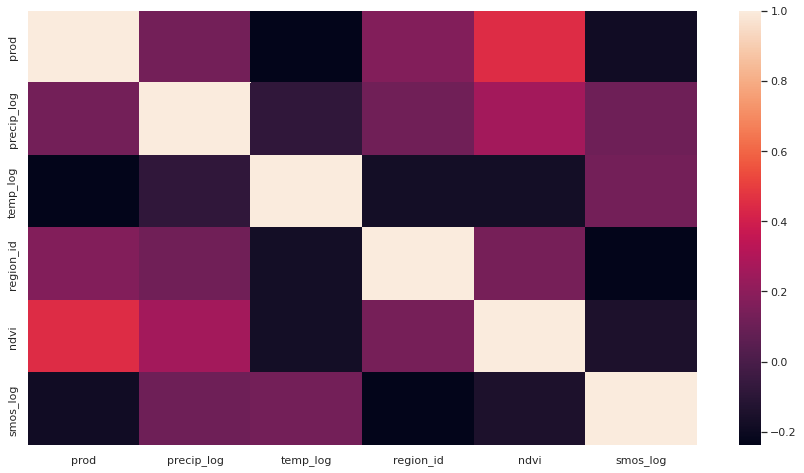

In [ ]:
from numpy import log
data['precip_log'] = log(data['precip'])
data['smos_log'] = log(data['smos'])
data['temp_log'] = log(data['temp'])
columns = ['prod','precip_log','temp_log','region_id','ndvi','smos_log']
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data[columns].corr())

Observations:
1. From the correlation heatmap we can identify that the **production quantity** is correlated to **ndvi data**. 
2. production quantity is correlated to the prepitation.
3. production quanity looks correlated to precipitation and temperature
4. production quantity is correlated to region_id

WINDOW FUNCTIONS: used to identify sub-periods and calculate sub-metrics
(Rolling - Same size and sliding)

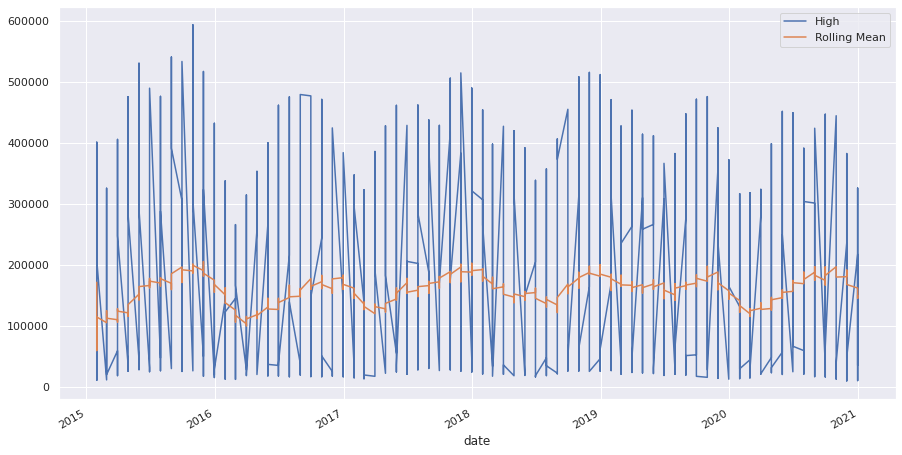

In [ ]:
# Rolling window functions
data = data.sort_index()
rolling_prod = data['prod'].rolling('90D').mean()
data['prod'].plot()
rolling_prod.plot()
plt.legend(['High','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of google stocks
plt.show()

### Trends Seasonality and Noise

Trend, Seasonality and Noise

These are the components of a time series:
- Trend - Consistent upwards or downwards slope of a time series
- Seasonality - Clear periodic pattern of a time series(like sine funtion)
- Noise - Outliers or missing values

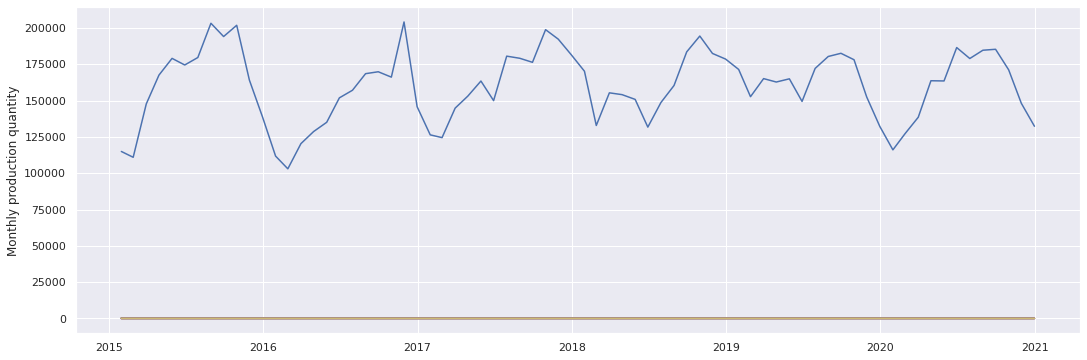

In [ ]:
plt.figure(figsize=(18,6))
monthly = data.resample('M').mean()
plt.plot(monthly)
plt.ylabel('Monthly production quantity');
plt.show()

<Figure size 1296x432 with 0 Axes>

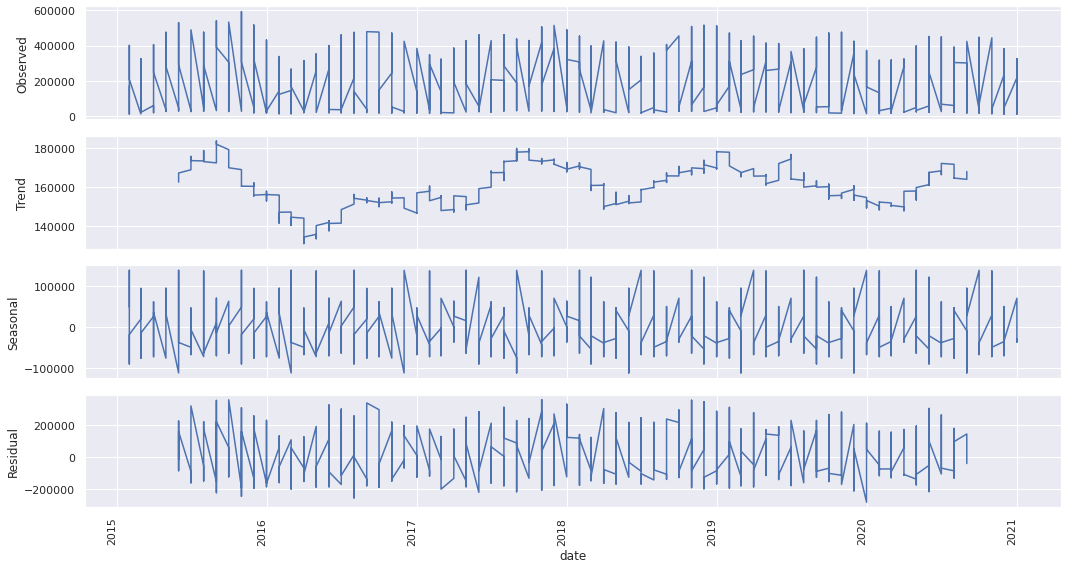

In [ ]:
plt.figure(figsize=(18,6))
decomposed_production = sm.tsa.seasonal_decompose(data['prod'],freq=90) # The frequncy is annual
figure = decomposed_production.plot()
plt.xticks(rotation=90) # Rotating X tickts by 45 degrees
plt.show()

Observation:
- There is clearly no trend in the above plot.
- You can also see the uniform seasonal change.
- Non-uniform noise that represent outliers and there are no missing values in the data

### Checking for stationarity

Stationarity: A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

Assumption for time series data: we assume that the time series data is stationary for forecasting the future data so we perform a Stationarity test to see if our time series data is stationary or not and then take the necessary steps to make it stationary

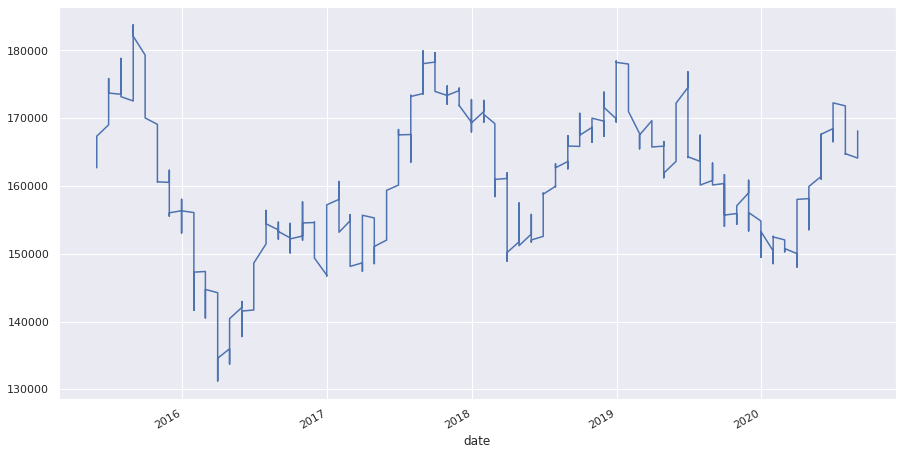

In [ ]:
decomposed_production.trend.plot()

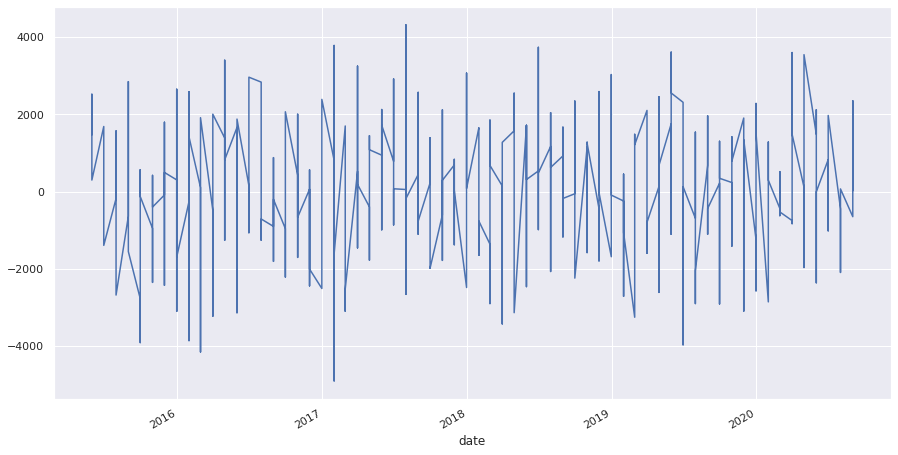

In [ ]:
decomposed_production.trend.diff().plot()

### Performing a Stationarity test (Augmented Dickey Fuller Test)

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

X = data['prod'].values
X = log(X)
result = adfuller(X, autolag='AIC')
print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -14.699688
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569
Reject Ho - Time Series is Stationary


After performing the dickey fuller test for stationarity it is clear that the time series data is stationary

Checking for autocorrelation function


It means the correlation of the present values with its past values. An autocorrelation function measures the degree of similarity of the present series with that of its lagged series (past values). The production quantity shows a steady pace of decrease in the production which is an indication that the series is autocorrelated

<Figure size 1296x432 with 0 Axes>

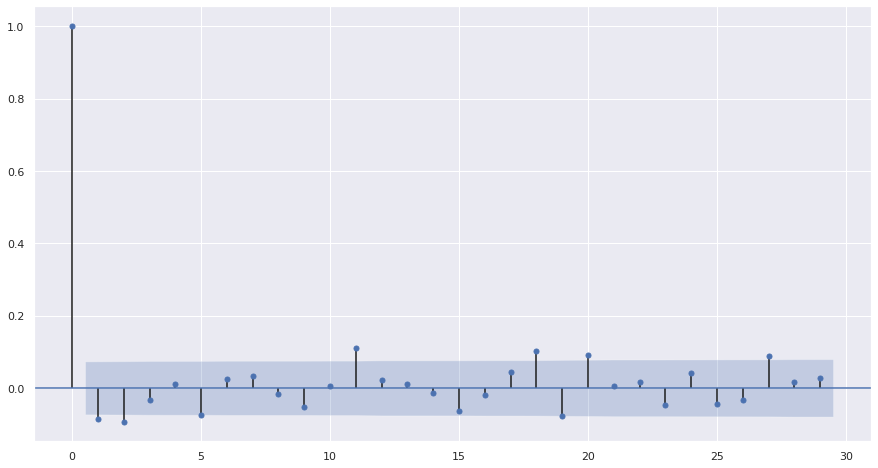

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(18,6))
plot_acf(data['prod'])
plt.title('')

plt.show()

### Autoregressive Models

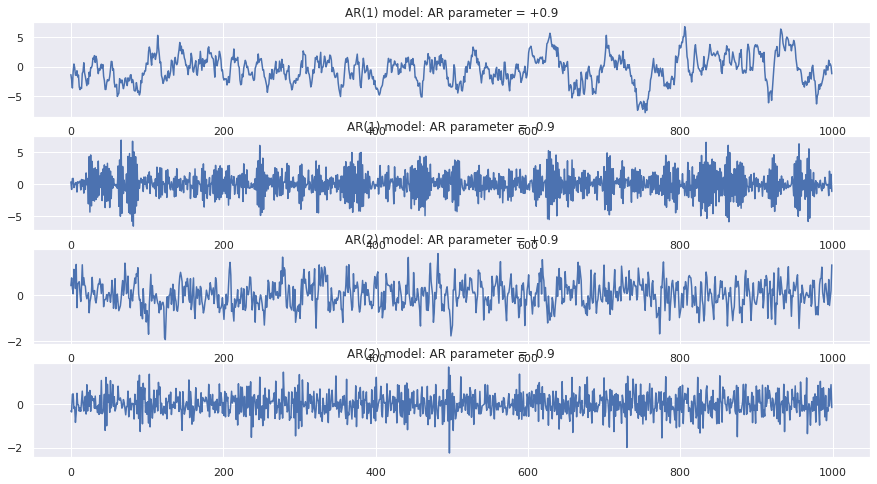

In [ ]:
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

In [ ]:
model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1466.983
Method:                       css-mle   S.D. of innovations              1.048
Date:                Tue, 05 Apr 2022   AIC                           2939.967
Time:                        15:19:57   BIC                           2954.690
Sample:                             0   HQIC                          2945.563
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4842      0.301     -1.607      0.108      -1.075       0.106
ar.L1.y        0.8908      0.014     62.471      0.000       0.863       0.919
                                    Roots           

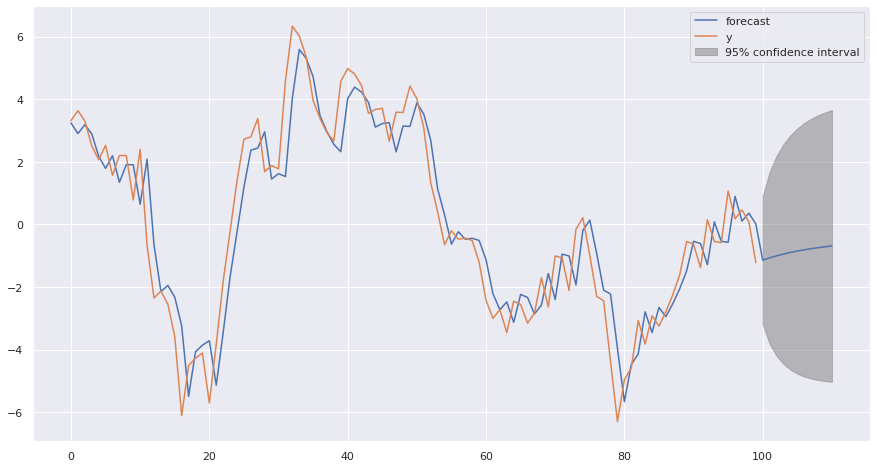

In [ ]:
# Predicting simulated AR(1) model 
result.plot_predict(start=900, end=1010)
plt.show()

### We perform a multivariate time series forecast using FB Prophet and Bidirectional LSTM model

### FORECASTING PRODUCTION QUANTITY USING FB PROPHET

In [ ]:
!pip install fbprophet

In [ ]:
from fbprophet import Prophet

data

,y,region_id,precip,smos,temp,ndvi
date,,,,,,
2015-01-31,171725,93,4.394452,0.318552,25.003593,0.761228
2015-02-28,188325,93,1.206137,0.291452,26.807568,0.758957
2015-03-31,247856,93,3.454652,0.251969,26.954109,0.752754
2015-04-30,282791,93,10.466472,0.248915,26.948865,0.785057
2015-05-31,291057,93,9.007986,0.280602,25.405121,0.805262
...,...,...,...,...,...,...
2020-08-31,57818,105,7.635350,0.225784,27.424585,0.813444
2020-09-30,57474,105,6.852630,0.277477,27.940492,0.810768
2020-10-31,51821,105,11.276676,0.277670,27.048770,0.815188


In [ ]:
data_ = data.rename(columns={'prod': 'y'})
data_.index.names = ['ds']

In [ ]:
data_.reset_index(inplace=True)
data_

,ds,y,region_id,precip,smos,temp,ndvi
0,2015-01-31,171725,93,4.394452,0.318552,25.003593,0.761228
1,2015-02-28,188325,93,1.206137,0.291452,26.807568,0.758957
2,2015-03-31,247856,93,3.454652,0.251969,26.954109,0.752754
3,2015-04-30,282791,93,10.466472,0.248915,26.948865,0.785057
4,2015-05-31,291057,93,9.007986,0.280602,25.405121,0.805262
...,...,...,...,...,...,...,...
711,2020-08-31,57818,105,7.635350,0.225784,27.424585,0.813444
712,2020-09-30,57474,105,6.852630,0.277477,27.940492,0.810768
713,2020-10-31,51821,105,11.276676,0.277670,27.048770,0.815188
714,2020-11-30,44947,105,17.676531,0.302014,24.715070,0.803192


In [ ]:
data_groups = data_.groupby('region_id')

In [ ]:
data_groups.head()

,ds,y,region_id,precip,smos,temp,ndvi
0,2015-01-31,171725,93,4.394452,0.318552,25.003593,0.761228
1,2015-02-28,188325,93,1.206137,0.291452,26.807568,0.758957
2,2015-03-31,247856,93,3.454652,0.251969,26.954109,0.752754
3,2015-04-30,282791,93,10.466472,0.248915,26.948865,0.785057
4,2015-05-31,291057,93,9.007986,0.280602,25.405121,0.805262
72,2015-01-31,15066,94,1.444303,0.268754,26.559232,0.768596
73,2015-02-28,20527,94,2.235412,0.250164,29.142522,0.685754
74,2015-03-31,31839,94,2.872151,0.223470,29.612283,0.705753
75,2015-04-30,33341,94,11.580010,0.294180,27.654164,0.730657
76,2015-05-31,35627,94,10.652136,0.320435,26.173197,0.768768


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Passing 'suffixes' which cause duplicate columns {'trend_lower_x', 'trend_x', 'multiplicative_te

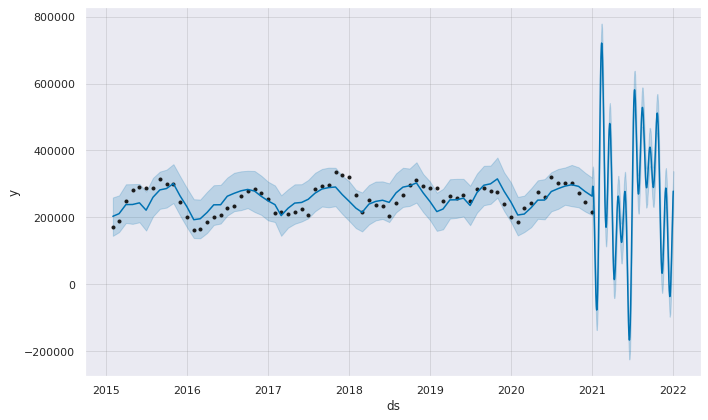

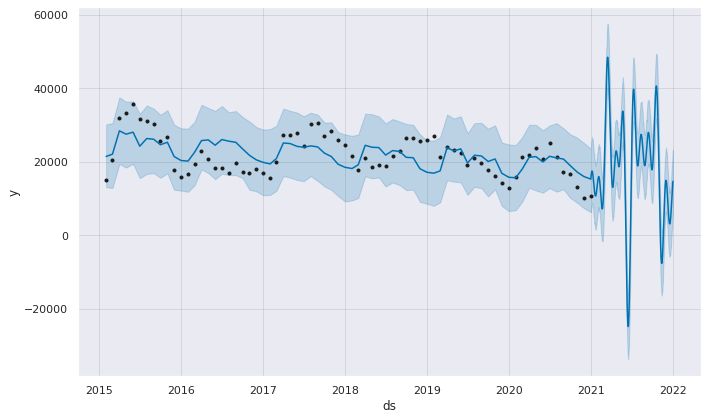

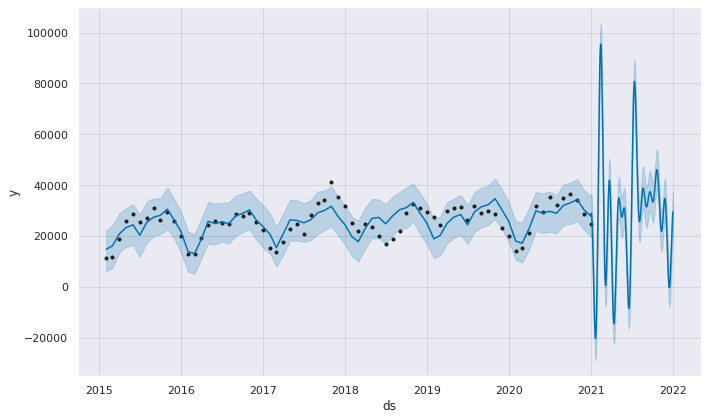

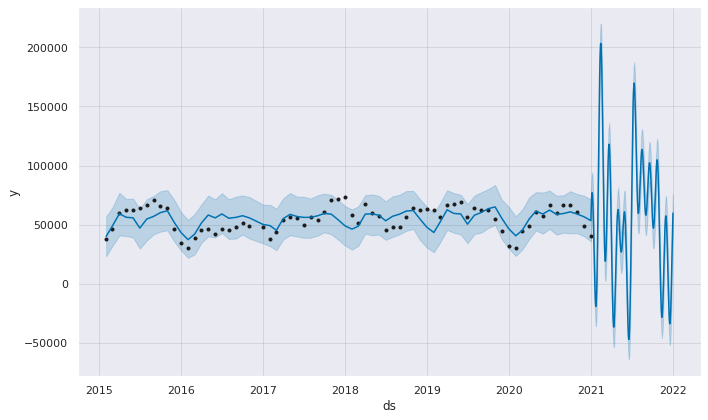

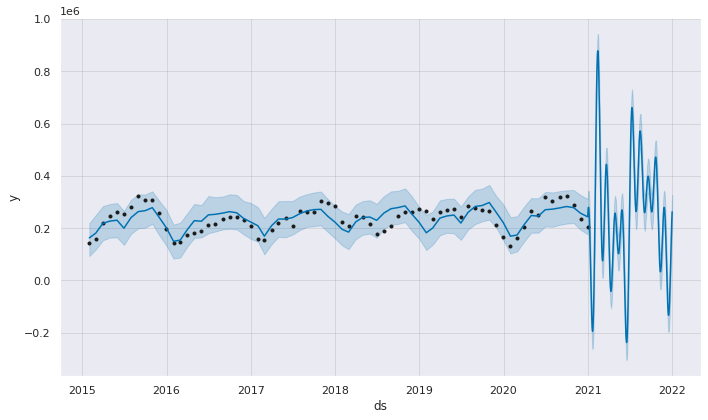

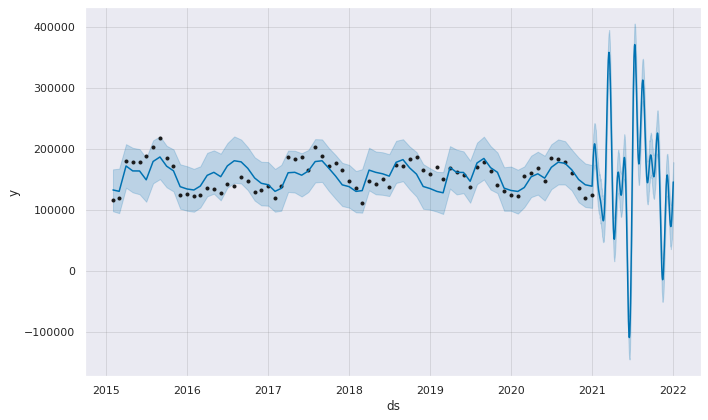

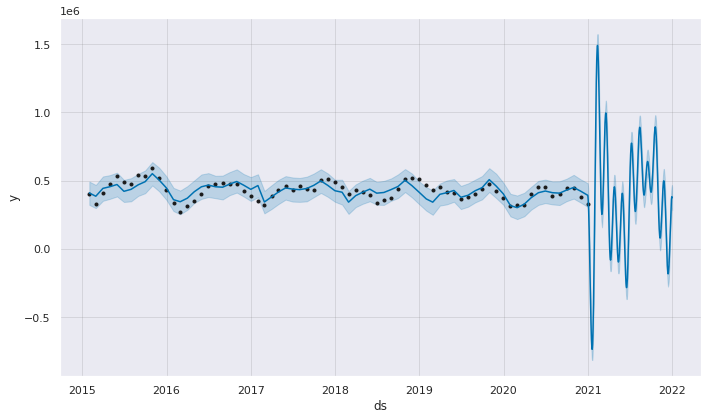

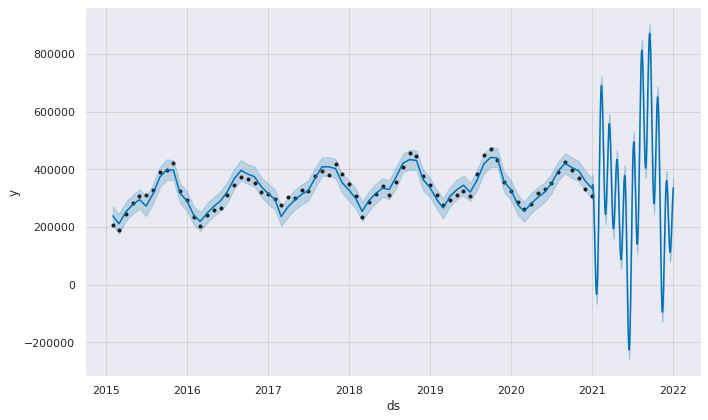

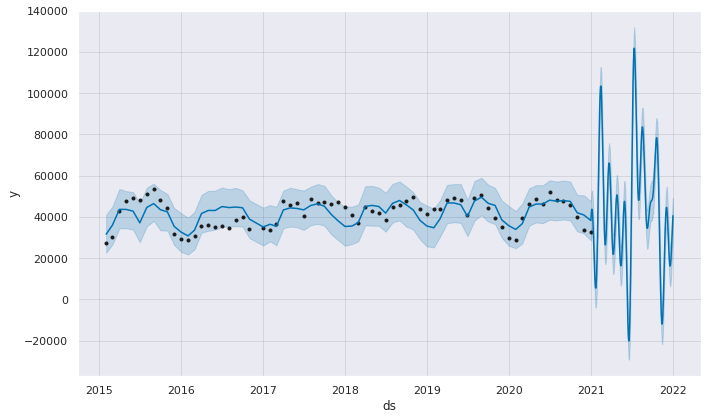

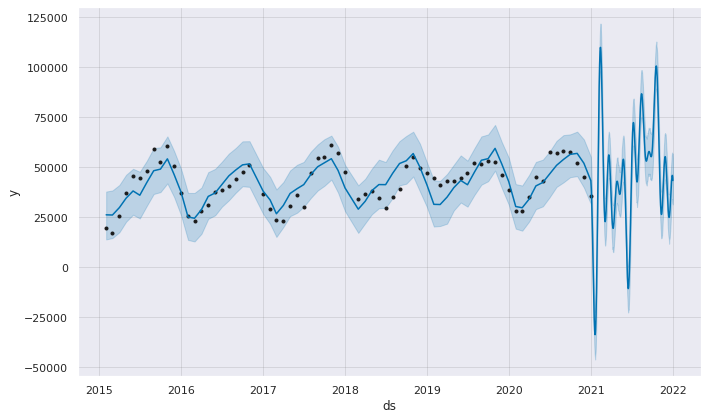

In [ ]:
target=pd.DataFrame()
for region in data_groups.groups:
    group = data_groups.get_group(region)
    
    m = Prophet(interval_width=0.95)
    m.fit(group)
    future = m.make_future_dataframe(periods=366)
    forecast = m.predict(future)  
    m.plot(forecast)  
    forecast = forecast.rename(columns={'yhat': 'yhat_'+str(region)})
    target = pd.merge(target, forecast.set_index('ds'), how='outer', left_index=True, right_index=True)

In [ ]:
target = target[['yhat_' + str(region) for region in data_groups.groups.keys()]]

In [ ]:
target

,yhat_93,yhat_94,yhat_95,yhat_97,yhat_98,yhat_99,yhat_102,yhat_103,yhat_104,yhat_105
ds,,,,,,,,,,
2015-01-31,203366.160641,21470.931134,14735.908138,40070.584313,162502.266503,132590.797010,409110.240637,238454.908901,31619.147662,26113.400332
2015-02-28,211124.857888,22086.599659,16093.643670,48894.366354,180859.443589,130331.737081,385382.889825,210923.619544,36025.163869,26017.358093
2015-03-31,238386.864650,28427.018081,20854.067484,59255.970363,218505.603603,171854.603222,443027.686148,252612.795366,43656.740547,29732.845853
2015-04-30,238642.978978,27520.567820,23301.941482,56223.922949,226733.885171,163777.656962,455037.007407,276859.551862,43635.655109,34450.778744
2015-05-31,243565.157174,28068.693426,24351.382235,55735.453280,230247.532330,163658.293634,471249.121131,294909.770603,42802.499609,38043.289155
...,...,...,...,...,...,...,...,...,...,...
2021-12-28,192819.876559,11013.199782,22882.421259,25587.063425,156168.653444,106640.475502,334730.045226,274631.846396,30824.096348,45398.723880
2021-12-29,219017.038984,12076.711207,25107.512521,34909.367845,188632.885647,115842.750159,361098.860422,294415.589211,33513.810189,45823.295803
2021-12-30,242519.016965,13069.346353,26991.739053,43878.052528,217717.263641,125569.651118,377217.927105,311606.452623,36096.040386,45643.467632


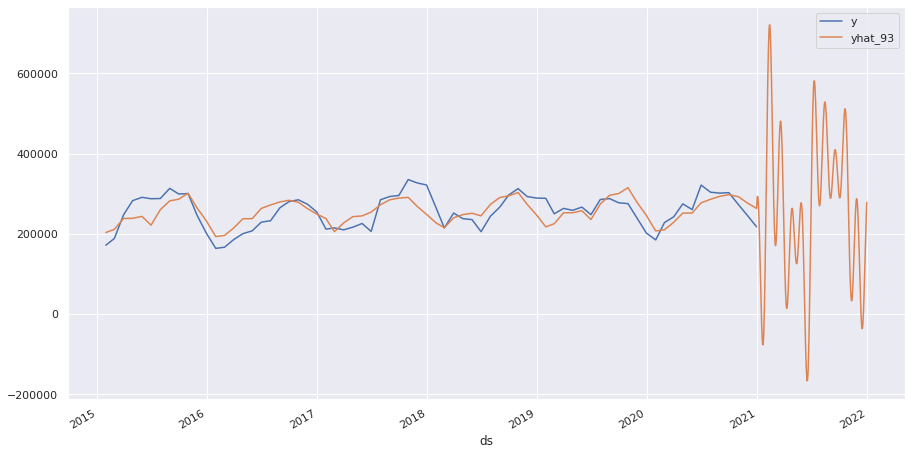

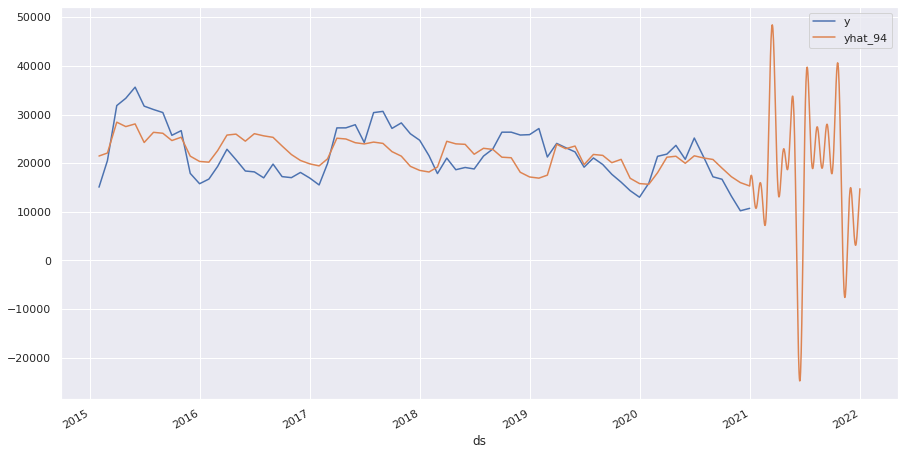

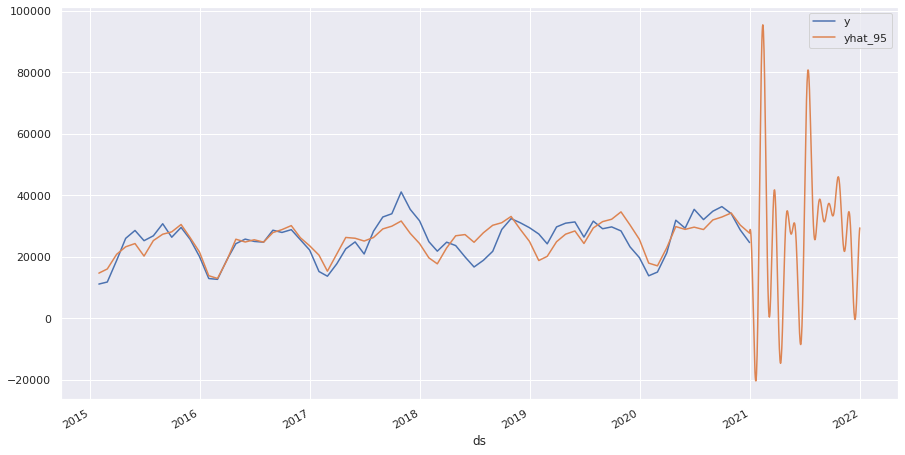

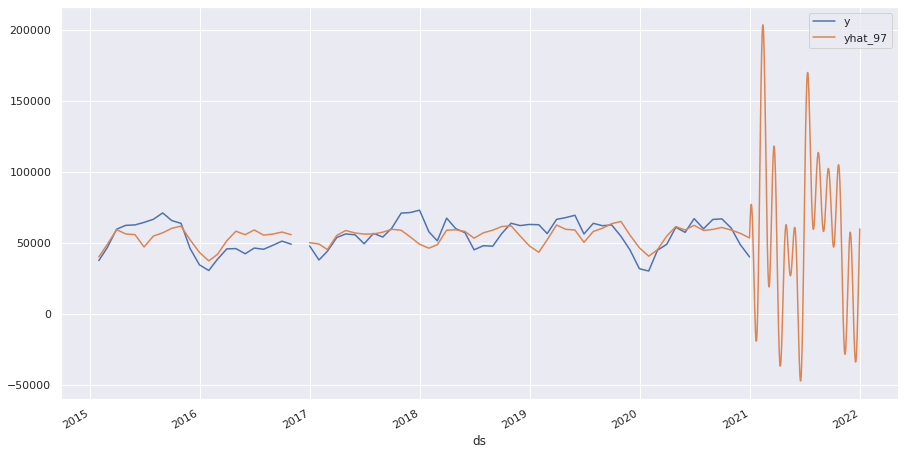

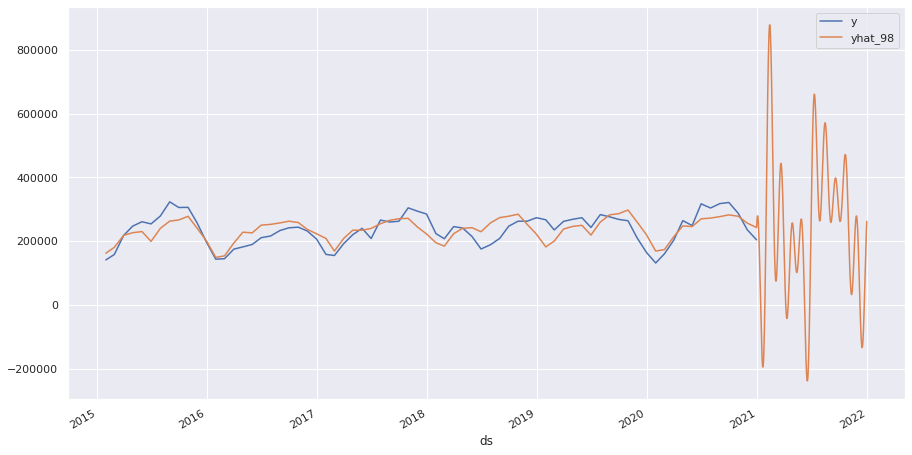

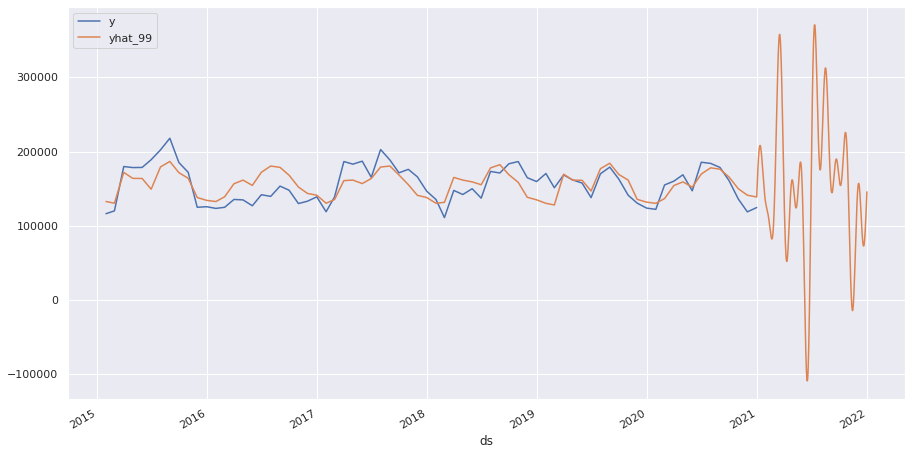

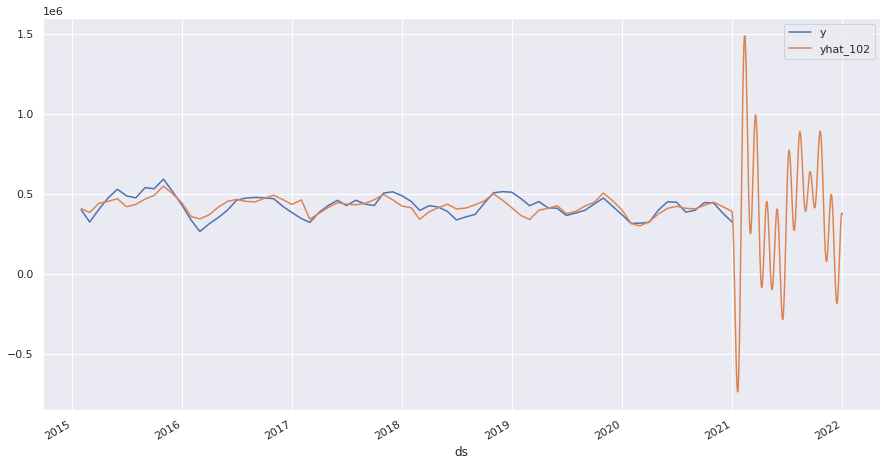

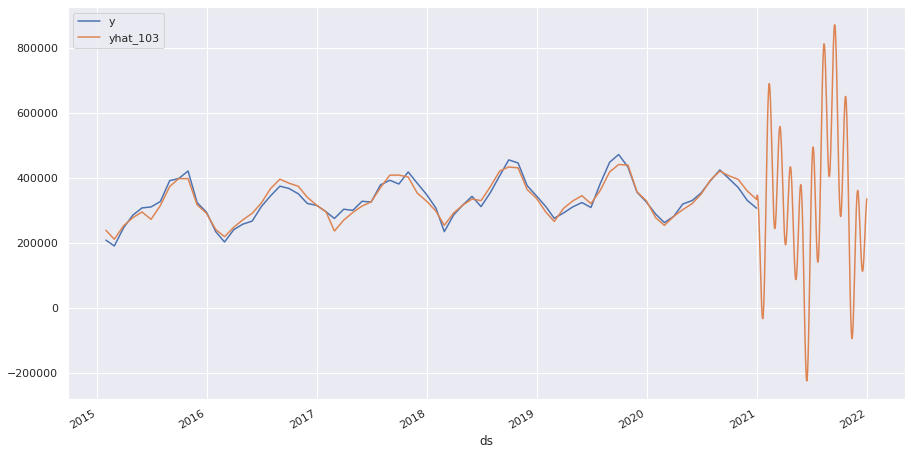

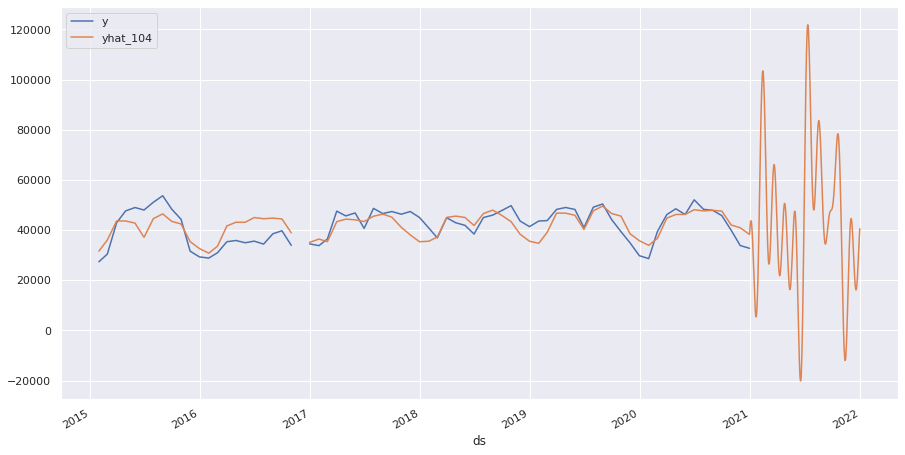

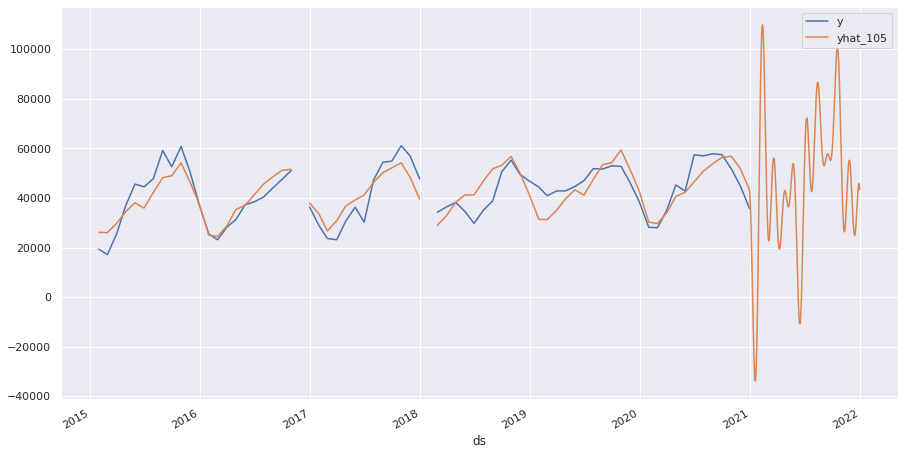

In [ ]:
pd.concat([data_.set_index('ds').query("region_id==93")['y'],target['yhat_93']],axis=1).plot()
pd.concat([data_.set_index('ds').query("region_id==94")['y'],target['yhat_94']],axis=1).plot()
pd.concat([data_.set_index('ds').query("region_id==95")['y'],target['yhat_95']],axis=1).plot()
pd.concat([data_.set_index('ds').query("region_id==97")['y'],target['yhat_97']],axis=1).plot()
pd.concat([data_.set_index('ds').query("region_id==98")['y'],target['yhat_98']],axis=1).plot()
pd.concat([data_.set_index('ds').query("region_id==99")['y'],target['yhat_99']],axis=1).plot()
pd.concat([data_.set_index('ds').query("region_id==102")['y'],target['yhat_102']],axis=1).plot()
pd.concat([data_.set_index('ds').query("region_id==103")['y'],target['yhat_103']],axis=1).plot()
pd.concat([data_.set_index('ds').query("region_id==104")['y'],target['yhat_104']],axis=1).plot()
pd.concat([data_.set_index('ds').query("region_id==105")['y'],target['yhat_105']],axis=1).plot()

### PERFORMING TIME SERIES FORECASTING WITH BIDIRECTIONAL LSTM MODEL

 Since its a multivariate analysis where we want to understand the correlation between the features: precipitation, soil moisture, temperature and ndvi with the production quantity so we perform a multivariate multi-step analysis using LSTM

In [ ]:
data

,prod,region_id,precip,smos,temp,ndvi,precip_log,smos_log,temp_log
date,,,,,,,,,
2015-01-31,171725,93,4.394452,0.318552,25.003593,0.761228,1.480343,-1.143971,3.219020
2015-01-31,11181,95,1.520387,0.374408,23.126085,0.745063,0.418965,-0.982410,3.140961
2015-01-31,19382,105,3.341109,0.242738,23.825025,0.758762,1.206303,-1.415771,3.170737
2015-01-31,37505,97,1.942695,0.309382,25.051505,0.762038,0.664076,-1.173180,3.220934
2015-01-31,141442,98,2.791116,0.281108,24.094009,0.778641,1.026442,-1.269017,3.181963
...,...,...,...,...,...,...,...,...,...
2020-12-31,124475,99,6.322229,0.320579,24.405432,0.806880,1.844072,-1.137628,3.194806
2020-12-31,326135,102,7.000175,0.261280,24.440675,0.837911,1.945935,-1.342163,3.196249
2020-12-31,306488,103,9.861948,0.325129,24.605291,0.824312,2.288684,-1.123533,3.202961


In [ ]:
data.drop(['precip_log', 'smos_log','temp_log'], inplace=True, axis = 1)


In [ ]:
validate = data[['prod','region_id', 'precip', 'smos', 'temp', 'ndvi']].tail(12)
data.drop(data.tail(12).index,inplace=True)

In [ ]:
data

,prod,region_id,precip,smos,temp,ndvi
date,,,,,,
2015-01-31,171725,93,4.394452,0.318552,25.003593,0.761228
2015-01-31,11181,95,1.520387,0.374408,23.126085,0.745063
2015-01-31,19382,105,3.341109,0.242738,23.825025,0.758762
2015-01-31,37505,97,1.942695,0.309382,25.051505,0.762038
2015-01-31,141442,98,2.791116,0.281108,24.094009,0.778641
...,...,...,...,...,...,...
2020-10-31,273522,93,4.068495,0.335050,28.402645,0.813638
2020-10-31,51821,105,11.276676,0.277670,27.048770,0.815188
2020-10-31,370161,103,7.885308,0.230797,26.225316,0.831405


the first step will be to standardize the dataset using the mean and standard deviation of the training data.

In [ ]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
X_data = X_scaler.fit_transform(data[['region_id', 'precip', 'smos', 'temp', 'ndvi']])
Y_data = Y_scaler.fit_transform(data[['prod']])

In [ ]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
     X = []
     y = []
     start = start + window
     if end is None:
         end = len(dataset) - horizon
     for i in range(start, end):
         indices = range(i-window, i)
         X.append(dataset[indices])
         indicey = range(i+1, i+1+horizon)
         y.append(target[indicey])
     return np.array(X), np.array(y) 

In [ ]:
Y_data.shape

(696, 1)

In [ ]:
n_past = 45
n_future = 12
TRAIN_SPLIT = 522 #taking 75% as train and 25% as test

In [ ]:
x_train, y_train = custom_ts_multi_data_prep(X_data, Y_data, 0, TRAIN_SPLIT, n_past, n_future)
x_valid, y_valid = custom_ts_multi_data_prep(X_data, Y_data, TRAIN_SPLIT, None, n_past, n_future) 

In [ ]:
x_train.shape

(477, 45, 5)

In [ ]:
print ('Multiple window of past history\n')
print(x_train[0])
print ('\n Target horizon\n')
print (y_train[0]) 

Multiple window of past history

[[0.         0.20055772 0.69191161 0.24284853 0.62711464]
 [0.16666667 0.0638588  0.84781243 0.04109299 0.55637651]
 [1.         0.15045763 0.48030759 0.11620053 0.61632308]
 [0.33333333 0.083945   0.66631704 0.24799711 0.63065919]
 [0.41666667 0.12429838 0.58740131 0.14510527 0.70331095]
 [0.91666667 0.16138075 0.6844152  0.50344906 0.43687035]
 [0.5        0.13077037 0.71027662 0.26898702 0.74008779]
 [0.75       0.33176995 0.5766169  0.         0.7804985 ]
 [0.08333333 0.06024004 0.55291996 0.41001629 0.65935215]
 [0.83333333 0.65323725 0.74435253 0.09314818 0.74436301]
 [0.16666667 0.02323307 0.46170391 0.28230275 0.50741634]
 [0.75       0.05123484 0.63925498 0.1719893  0.87882038]
 [1.         0.05237527 0.3757915  0.27071294 0.61743863]
 [0.         0.04891218 0.61627263 0.43670237 0.61717749]
 [0.5        0.12217953 0.52639907 0.37088906 0.67571176]
 [0.83333333 0.34631395 0.68266983 0.1569902  0.83058584]
 [0.91666667 0.1079836  0.54620857 0.57

In [ ]:
batch_size = 256
buffer_size = 150
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat()
val_data = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
val_data = val_data.batch(batch_size).repeat()

In [ ]:
lstm_model = tf.keras.models.Sequential([
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, return_sequences=True), 
                                input_shape=x_train.shape[-2:]),
     tf.keras.layers.Dense(20, activation='tanh'),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
     tf.keras.layers.Dense(20, activation='tanh'),
     tf.keras.layers.Dense(20, activation='tanh'),
     tf.keras.layers.Dropout(0.25),
     tf.keras.layers.Dense(units=n_future),
 ])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 45, 400)          329600    
 l)                                                              
                                                                 
 dense (Dense)               (None, 45, 20)            8020      
                                                                 
 bidirectional_1 (Bidirectio  (None, 300)              205200    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 20)                6020      
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0

In [ ]:
model_path = 'Bidirectional_LSTM_Multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
callbacks=[early_stopings,checkpoint] 
history = lstm_model.fit(train_data,epochs=150,steps_per_epoch=100,validation_data=val_data,validation_steps=50,verbose=1,callbacks=callbacks)

Epoch 1/150
100/100 [==============================] - 112s 1s/step - loss: 0.0739 - val_loss: 0.0582
Epoch 2/150
100/100 [==============================] - 103s 1s/step - loss: 0.0640 - val_loss: 0.0585
Epoch 3/150
100/100 [==============================] - 101s 1s/step - loss: 0.0619 - val_loss: 0.0587
Epoch 4/150
100/100 [==============================] - 102s 1s/step - loss: 0.0605 - val_loss: 0.0588
Epoch 5/150
100/100 [==============================] - 102s 1s/step - loss: 0.0593 - val_loss: 0.0612
Epoch 6/150
100/100 [==============================] - 102s 1s/step - loss: 0.0578 - val_loss: 0.0643
Epoch 7/150
100/100 [==============================] - 102s 1s/step - loss: 0.0556 - val_loss: 0.0678
Epoch 8/150
100/100 [==============================] - 101s 1s/step - loss: 0.0524 - val_loss: 0.0709
Epoch 9/150
100/100 [==============================] - 101s 1s/step - loss: 0.0497 - val_loss: 0.0740
Epoch 10/150
100/100 [==============================] - 102s 1s/step - loss: 0.044

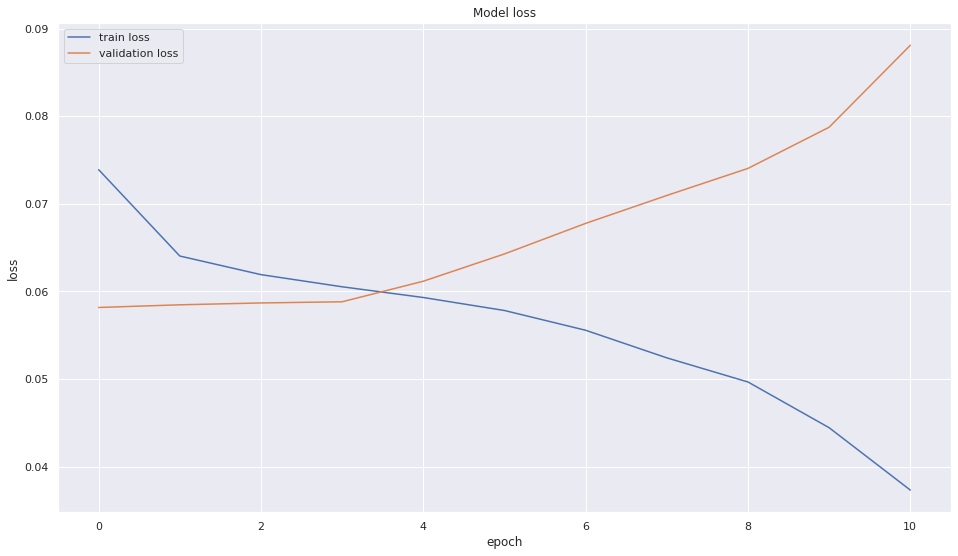

In [ ]:
 plt.figure(figsize=(16,9))
 plt.plot(history.history['loss'])
 plt.plot(history.history['val_loss'])
 plt.title('Model loss')
 plt.ylabel('loss')
 plt.xlabel('epoch')
 plt.legend(['train loss', 'validation loss'])
 plt.show() 

In [ ]:
data_val = X_scaler.fit_transform(data[['precip', 'region_id', 'smos', 'temp', 'ndvi']].tail(45))
val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])
pred = lstm_model.predict(val_rescaled)
pred_Inverse = Y_scaler.inverse_transform(pred)
pred_Inverse 

array([[104533.266, 104754.77 ,  36326.32 , 150148.42 , 218786.55 ,
        226355.42 ,  18850.014,  21463.95 ,  50118.13 ,  50934.26 ,
         18614.725, 114544.79 ]], dtype=float32)

In [ ]:
from sklearn import metrics
def timeseries_evaluation_metrics_func(y_true, y_pred):
  def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  print('Evaluation metric results:-')
  print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
  print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
  print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n') 
timeseries_evaluation_metrics_func(validate['prod'],pred_Inverse[0])



Evaluation metric results:-
RMSE is : 175780.54634176704
MAPE is : 99.00547503607692
R2 is : -0.4870341730345562



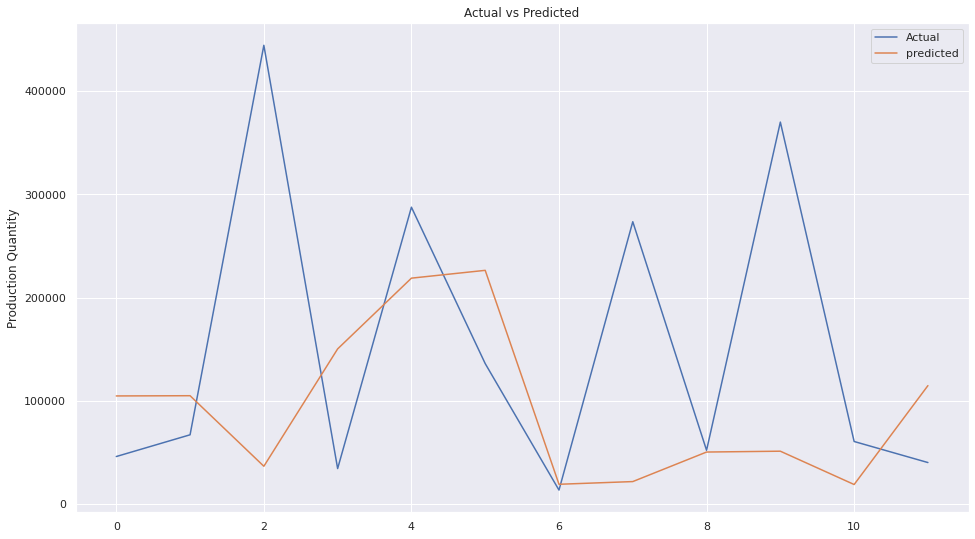

In [ ]:
 plt.figure(figsize=(16,9))
 plt.plot( list(validate['prod']))
 plt.plot( list(pred_Inverse[0]))
 plt.title("Actual vs Predicted")
 plt.ylabel("Production Quantity")
 plt.legend(('Actual','predicted'))
 plt.show()

In [ ]:
predicted_data = pd.read_csv('/content/predicted_production_qty.csv')
predicted_data

,start_date,end_date,prod,region_id
0,2021-01-01T00:00:00.000Z,2021-01-31T00:00:00.000Z,NaN,93
1,2021-02-01T00:00:00.000Z,2021-02-28T00:00:00.000Z,NaN,93
2,2021-03-01T00:00:00.000Z,2021-03-31T00:00:00.000Z,NaN,93
3,2021-04-01T00:00:00.000Z,2021-04-30T00:00:00.000Z,NaN,93
4,2021-05-01T00:00:00.000Z,2021-05-31T00:00:00.000Z,NaN,93
...,...,...,...,...
115,2021-08-01T00:00:00.000Z,2021-08-31T00:00:00.000Z,NaN,105
116,2021-09-01T00:00:00.000Z,2021-09-30T00:00:00.000Z,NaN,105
117,2021-10-01T00:00:00.000Z,2021-10-31T00:00:00.000Z,NaN,105
118,2021-11-01T00:00:00.000Z,2021-11-30T00:00:00.000Z,NaN,105


In [ ]:
regions = predicted_data['region_id'].unique()

pred_values = np.resize(pred_Inverse,12*10)

predicted_data['prod'] = pred_values.tolist()

In [ ]:
predicted_data

,start_date,end_date,prod,region_id
0,2021-01-01T00:00:00.000Z,2021-01-31T00:00:00.000Z,104533.265625,93
1,2021-02-01T00:00:00.000Z,2021-02-28T00:00:00.000Z,104754.773438,93
2,2021-03-01T00:00:00.000Z,2021-03-31T00:00:00.000Z,36326.320312,93
3,2021-04-01T00:00:00.000Z,2021-04-30T00:00:00.000Z,150148.421875,93
4,2021-05-01T00:00:00.000Z,2021-05-31T00:00:00.000Z,218786.546875,93
...,...,...,...,...
115,2021-08-01T00:00:00.000Z,2021-08-31T00:00:00.000Z,21463.949219,105
116,2021-09-01T00:00:00.000Z,2021-09-30T00:00:00.000Z,50118.128906,105
117,2021-10-01T00:00:00.000Z,2021-10-31T00:00:00.000Z,50934.261719,105
118,2021-11-01T00:00:00.000Z,2021-11-30T00:00:00.000Z,18614.724609,105


In [ ]:
predicted_result = predicted_data.to_csv('/content/predicted_data.csv')